In [15]:
# keras module for building LSTM 
from keras.utils import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 

# set seeds for reproducability
import tensorflow
from numpy.random import seed
tensorflow.random.set_seed(2)
seed(1)

import pandas as pd
import numpy as np
import string, os 

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
curr_dir = './'
all_headlines = []

for filename in os.listdir(curr_dir):
    if 'Articles' in filename:
        with open(curr_dir + filename, 'r') as f:
            lines = f.readlines()
            for line_num, line in enumerate(lines):
                try:
                    fields = line.split(',')
                    headline = fields[0]
                    if headline != "Unknown":
                        all_headlines.append(headline)
                except Exception as e:
                    print(f"Error in file {filename} on line {line_num}: {e}")
print("Número de manchetes:", len(all_headlines))



Número de manchetes: 9551


In [17]:
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt 

corpus = [clean_text(x) for x in all_headlines]
corpus[:10]

['comentarionotadata\n',
 'o parque  lindo fizemos a trilha dos saltos amarela  possvel fazer sem guia',
 'impossvel descrever com palavras oq s presencialmente se vivncia o guia chico 62 981150774',
 'eu fiz a trilha vermelha e o visual  de tirar o flego',
 'um lugar lindo',
 'um dia em alto paraiso de goias',
 'o parque  bem famoso mas no tem muita acessibilidade para cadeirantes ou qualquer outra pessoa com comorbidade',
 'na minha opinio no tem como a pessoa vir ate a chapada e no conhecer o parque nacional logo na entrada podemos escolher entre 3 ou 4 trilhas',
 'o parque no informa que no perodo sem chuvas o canions ficam secos e somente com gua parada para banhoa trilha vermelha cariocascanions no deve ser feita em tempo de seca',
 'espetacular parque com trilhas que nos trazem a ns mesmos e visuais de tirar o flego oportunidade de contato com a natureza intocada e selvagem do cerrado da ate para banhos']

In [18]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[:10]

[[4, 18],
 [4, 18, 60],
 [4, 18, 60, 93],
 [4, 18, 60, 93, 2],
 [4, 18, 60, 93, 2, 34],
 [4, 18, 60, 93, 2, 34, 11],
 [4, 18, 60, 93, 2, 34, 11, 82],
 [4, 18, 60, 93, 2, 34, 11, 82, 559],
 [4, 18, 60, 93, 2, 34, 11, 82, 559, 163],
 [4, 18, 60, 93, 2, 34, 11, 82, 559, 163, 78]]

In [19]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [20]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 110, 10)           93860     
                                                                 
 lstm_1 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 9386)              947986    
                                                                 
Total params: 1,086,246
Trainable params: 1,086,246
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(predictors, label, epochs=100, batch_size=256, verbose=5)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [22]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [23]:
import tensorflow as tf

def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted = tf.argmax(predicted_probs, axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text.title()

In [27]:
print (generate_text("mercado do veropeso", 20, model, max_sequence_len))
print (generate_text("lindo e muito", 30, model, max_sequence_len))


Mercado Do Veropeso Um Lugar Muito Bonito E Explorado De Semana E O Local De Um Nico L Se Deparar Com A Sujeira
Lindo E Muito Bem Cuidado Com Batedores De Carteira Embora Seja O Lugar Sujo E Mal Conservado Um Lugar Muito Agradvel Para Quem Quer Conhecer Um Pouco Mais Sobre A Cultura Local De


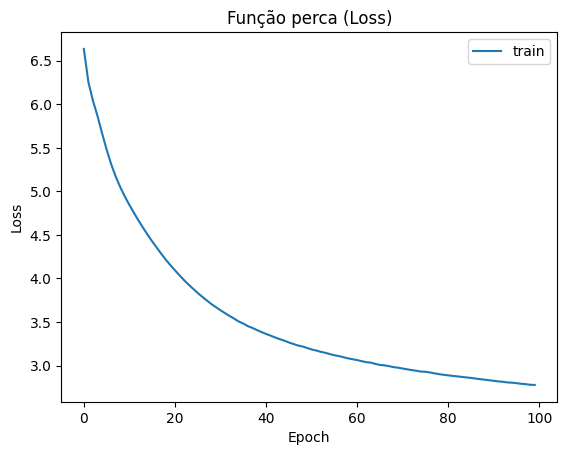

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.title('Função perca (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()